<a href="https://colab.research.google.com/github/rsastri21/MovieTracker/blob/main/434_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 3

Rejection Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import uniform
from scipy.stats import norm

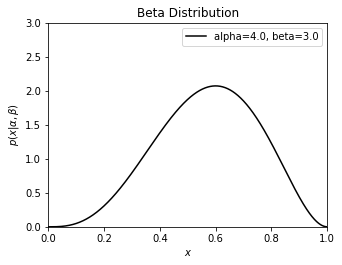

In [ ]:
# Starter code from the lab handout.

x = np.linspace(0, 1, 1002)[1:-1]
fig, ax = plt.subplots(figsize=(5, 3.75))
a = 4
b = 3
dist = beta(a, b)
plt.plot(x, dist.pdf(x), ls='-', c='black', label='alpha=4.0, beta=3.0')

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()

Uniform Sampling

2257


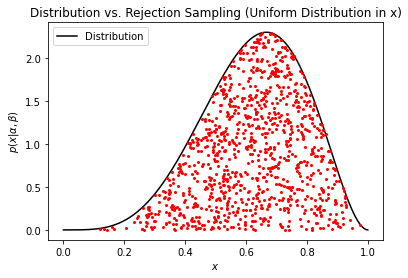

In [ ]:
# Creating beta(a = 5.0, b = 3.0)
x = np.linspace(0, 1, 1002)[1:-1]
a = 5
b = 3

dist = beta(a, b)

# Find maximum value of beta
max_beta = max(dist.pdf(x))

accepted_x = []
accepted_y = []

num_trials = 0
while len(accepted_x) < 1000:
  
  x_i = uniform.rvs(size=1)
  weight = dist.pdf(x_i)
  y = uniform.rvs(size=1) * max_beta

  if y < weight:
    accepted_x.append(x_i)
    accepted_y.append(y)

  num_trials += 1

print(num_trials)

# Visualization
fig, ax = plt.subplots(figsize=(6, 4))
# Plot distribution
ax.plot(x, dist.pdf(x), ls='-', c='black', label='Distribution')
# Plot accepted samples
ax.plot(accepted_x, accepted_y, 'o', c='red', markersize=2)

ax.set_xlabel('$x$')
ax.set_ylabel(r'$p(x|\alpha,\beta)$')
ax.set_title('Distribution vs. Rejection Sampling (Uniform Distribution in x)')
ax.legend()

plt.show()

Q1: The event weight formula is the probability distribution function. Scipy's beta distribution is used instead of hard-coding the formula.
<br>
Q2: The number of samplings required varies from trial to trial, but this particular trial required 2257 sampling pairs. 

Gaussian Sampling

2468


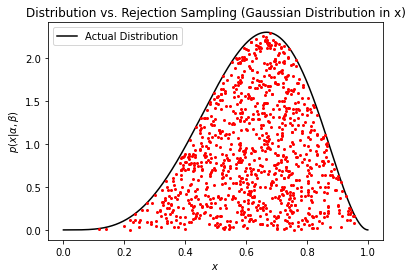

In [ ]:
# Creating beta(a = 5.0, b = 3.0)
x = np.linspace(0, 1, 1002)[1:-1]
a = 5
b = 3

dist = beta(a, b)

# Find maximum value of beta
max_beta = max(dist.pdf(x))

accepted_x = []
accepted_y = []

num_trials = 0
while len(accepted_x) < 1000:
  
  x_i = norm.rvs(size=1, loc=0.6, scale=0.4)
  weight = dist.pdf(x_i)
  y = uniform.rvs(size=1) * max_beta

  if y < weight:
    accepted_x.append(x_i)
    accepted_y.append(y)

  num_trials += 1

print(num_trials)

# Visualization
fig, ax = plt.subplots(figsize=(6, 4))
# Plot distribution
ax.plot(x, dist.pdf(x), ls='-', c='black', label='Actual Distribution')
# Plot accepted samples
ax.plot(accepted_x, accepted_y, 'o', c='red', markersize=2)

ax.set_xlabel('$x$')
ax.set_ylabel(r'$p(x|\alpha,\beta)$')
ax.set_title('Distribution vs. Rejection Sampling (Gaussian Distribution in x)')
ax.legend()

plt.show()

Q1: The mean was chosen to be 0.6 and the standard deviation was chosen to be 0.4 to more closely match the beta function. 
<br>
Q2: The beta function probability distribution function continued to be used as the weight formula. 
<br>
Q3: This configuration of the Gaussian distribution in generating x required 2468 sampling pairs to achieve 1000 accepted results. This is slightly greater than the results obtained with the uniform distribution. 

Sphere in 3D

Uniform Density

In [ ]:
def generate_coords(N):
  '''
  Generates random arrays of coordinates between -1 and 1 along
  all 3 axes.
  '''

  x = 2 * uniform.rvs(size=N) - 1
  y = 2 * uniform.rvs(size=N) - 1
  z = 2 * uniform.rvs(size=N) - 1

  return x, y, z

def in_sphere(x, y, z, r):
  '''
  Checks if the given points are contained within a sphere
  of radius 1 centered at the origin.
  '''
  return (x**2 + y**2 + z**2) <= (r**2)

def generate_index(x, y, z, r):
  '''
  Creates an index function that is 1 if a point is in the sphere 
  and 0 if a point is outside the sphere.
  '''
  size = len(x)
  index = np.zeros(size)
  for i in range(size):
    if in_sphere(x[i], y[i], z[i], r):
      index[i] = 1
  return index

def compute_mass(index, density, x, y, z, r):
  '''
  Computes the mass using Monte Carlo Integration
  Requires the density argument to be a lambda function.
  '''
  volume = (2*r)**3
  N = len(index)

  m = 0
  sum = 0
  for i in range(N):
    sum += density(x[i], y[i], z[i]) * index[i]
  
  m = volume * sum / N

  return m

def compute_uncertainty(index, r, N):
  std = np.std(index)
  volume = (2*r)**3
  unc = std * volume / np.sqrt(N)
  return unc

The mass for N = 100 is: 8.16


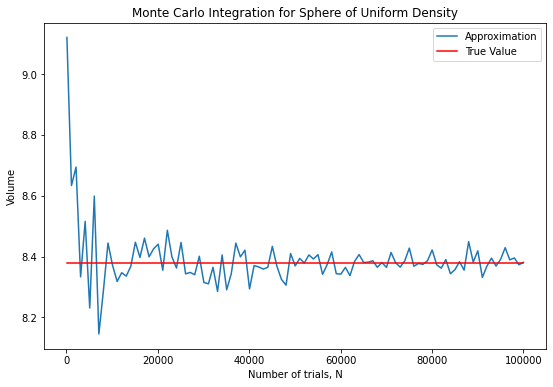

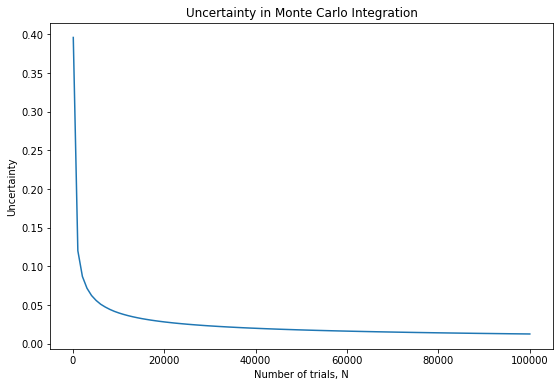

In [ ]:
# Uniform density case
density = lambda x, y, z: 2

# Generate coordinates
x, y, z = generate_coords(100)

# Generate index function
index = generate_index(x, y, z, 1)

# Compute mass
mass = compute_mass(index, density, x, y, z, 1)
print("The mass for N = 100 is:", mass)

# With increasing N
N = np.linspace(100, 100000, 101, dtype=int)
masses = np.zeros(101)
uncertainties = np.zeros(101)
true_val = 8 / 3 * np.pi
true_arr = np.ones(101) * true_val

# Compute masses for each N size
count = 0
for i in N:
  x, y, z = generate_coords(i)
  index = generate_index(x, y, z, 1)
  mass = compute_mass(index, density, x, y, z, 1)
  unc = compute_uncertainty(index, 1, i)
  uncertainties[count] = unc
  masses[count] = mass
  count += 1


# Create plots
fig1, ax1 = plt.subplots(figsize=(9, 6))
ax1.plot(N, masses, label="Approximation")
ax1.plot(N, true_arr, 'r-', label="True Value")

ax1.set_xlabel('Number of trials, N')
ax1.set_ylabel('Volume')
ax1.set_title("Monte Carlo Integration for Sphere of Uniform Density")
ax1.legend()

fig2, ax2 = plt.subplots(figsize=(9, 6))
ax2.plot(N, uncertainties)

ax2.set_xlabel('Number of trials, N')
ax2.set_ylabel('Uncertainty')
ax2.set_title('Uncertainty in Monte Carlo Integration')



plt.show()

As N increases, the Monte Carlo integration of the sphere approaches the true value. The uncertainty greatly decreases as the sample size increases as well. 

Linear Density

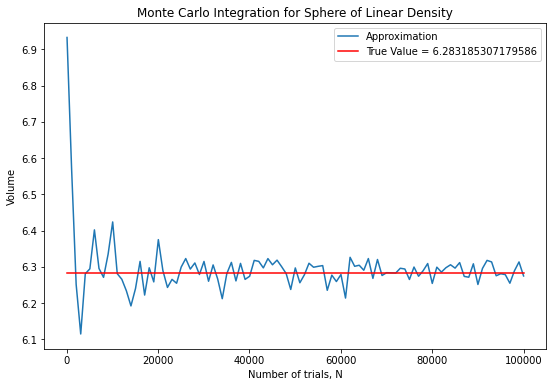

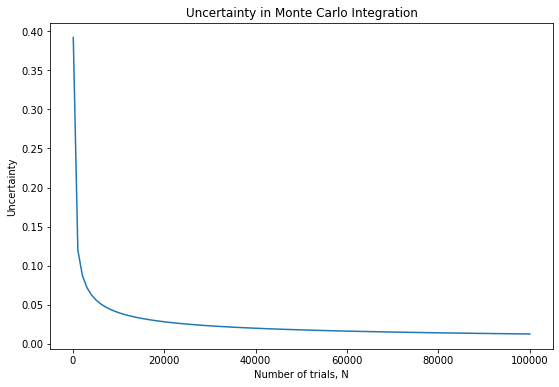

In [ ]:
# Create density function, choosing rho_0 to be 2
density1 = lambda x, y, z : 2 * np.sqrt(x**2 + y**2 + z**2)

# With increasing N
N = np.linspace(100, 100000, 101, dtype=int)
masses = np.zeros(101)
uncertainties = np.zeros(101)
true_val = 2 * np.pi
true_arr = np.ones(101) * true_val

# Compute masses for each N size
count = 0
for i in N:
  x, y, z = generate_coords(i)
  index = generate_index(x, y, z, 1)
  mass = compute_mass(index, density1, x, y, z, 1)
  unc = compute_uncertainty(index, 1, i)
  uncertainties[count] = unc
  masses[count] = mass
  count += 1


# Create plots
fig1, ax1 = plt.subplots(figsize=(9, 6))
ax1.plot(N, masses, label="Approximation")
ax1.plot(N, true_arr, 'r-', label="True Value = " + str(true_val))

ax1.set_xlabel('Number of trials, N')
ax1.set_ylabel('Volume')
ax1.set_title("Monte Carlo Integration for Sphere of Linear Density")
ax1.legend()

fig2, ax2 = plt.subplots(figsize=(9, 6))
ax2.plot(N, uncertainties)

ax2.set_xlabel('Number of trials, N')
ax2.set_ylabel('Uncertainty')
ax2.set_title('Uncertainty in Monte Carlo Integration')



plt.show()

Using a lambda function to define the linear density, the Monte Carlo approximation approaches the true value as N gets larger.

Bonus: Exponential Function

$\rho(r)=\frac{1}{\rho_0} exp^{-\rho_0 r}$

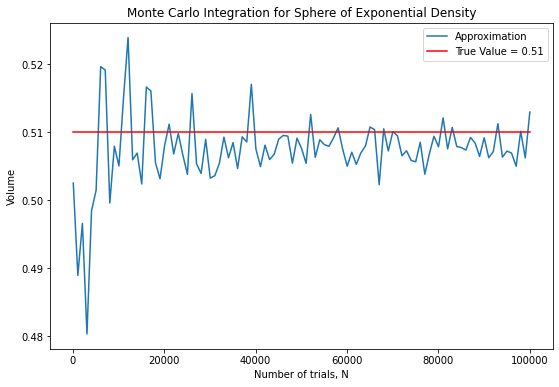

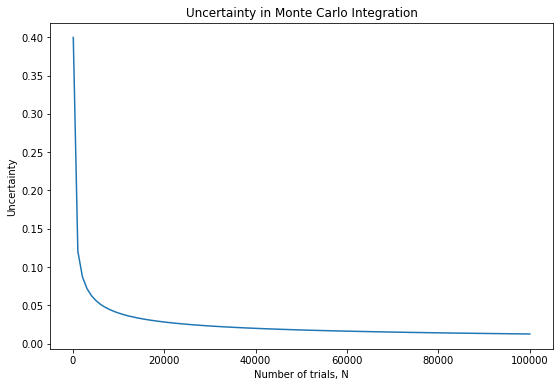

In [ ]:
# Choose rho_0 to be 2
density2 = lambda x, y, z: 0.5 * np.exp(-2*np.sqrt(x**2 + y**2 + z**2))

# With increasing N
N = np.linspace(100, 100000, 101, dtype=int)
masses = np.zeros(101)
uncertainties = np.zeros(101)
true_val = 0.51
true_arr = np.ones(101) * true_val

# Compute masses for each N size
count = 0
for i in N:
  x, y, z = generate_coords(i)
  index = generate_index(x, y, z, 1)
  mass = compute_mass(index, density2, x, y, z, 1)
  unc = compute_uncertainty(index, 1, i)
  uncertainties[count] = unc
  masses[count] = mass
  count += 1


# Create plots
fig1, ax1 = plt.subplots(figsize=(9, 6))
ax1.plot(N, masses, label="Approximation")
ax1.plot(N, true_arr, 'r-', label="True Value = " + str(true_val))

ax1.set_xlabel('Number of trials, N')
ax1.set_ylabel('Volume')
ax1.set_title("Monte Carlo Integration for Sphere of Exponential Density")
ax1.legend()

fig2, ax2 = plt.subplots(figsize=(9, 6))
ax2.plot(N, uncertainties)

ax2.set_xlabel('Number of trials, N')
ax2.set_ylabel('Uncertainty')
ax2.set_title('Uncertainty in Monte Carlo Integration')



plt.show()

Takeaways:<br>
The greater number of points generated with the Monte Carlo simulation yields a greater accuracy to the true value. Uncertainty decreases as N increases as well, in accordance with the scaling rule of $\frac{1}{\sqrt{N}}$.